In [4]:
import os
import sonia
from sonnia.sonnia import SoNNia
from sonnia.sonia import Sonia
from sonia.plotting import Plotter
from sonnia.processing import Processing
import numpy as np
import pandas as pd

# load lists of sequences with gene specification

In [2]:
# this assume data sequences are in semi-colon separated text file, with gene specification
data_seqs = pd.read_csv('data_seqs.csv.gz')

# preprocess data
processor=Processing(chain_type='humanTRB')
filtered=processor.filter_dataframe(data_seqs)

data_seqs=filtered.values.astype(str)
print(len(data_seqs))
data_seqs[:3]

bad genes: 0
unproductive: 0
wrong bounds: 0
long cdr3s: 0
200000


array([['CASSKQGASEAFF', 'TRBV7-8', 'TRBJ1-1'],
       ['CASSPPPNYGYTF', 'TRBV6-1', 'TRBJ1-2'],
       ['CASSTDTTEAFF', 'TRBV6-5', 'TRBJ1-1']], dtype='<U26')

# define and infer model

In [3]:
qm = SoNNia(data_seqs=data_seqs,chain_type='humanTRB')

Metal device set to: Apple M2
Encode data.


100%|██████████████████████████████████████| 200000/200000 [00:06<00:00, 28690.07it/s]


In [4]:
# add generated sequences (you can add them from file too, more is better.)
qm.add_generated_seqs(int(5e5)) 

100%|██████████████████████████████████████| 500000/500000 [00:18<00:00, 27051.26it/s]


Encode gen.


100%|██████████████████████████████████████| 500000/500000 [00:18<00:00, 26412.32it/s]


In [5]:
#define and train model
qm.infer_selection(epochs=50,batch_size=int(1e4))

# do some plotting

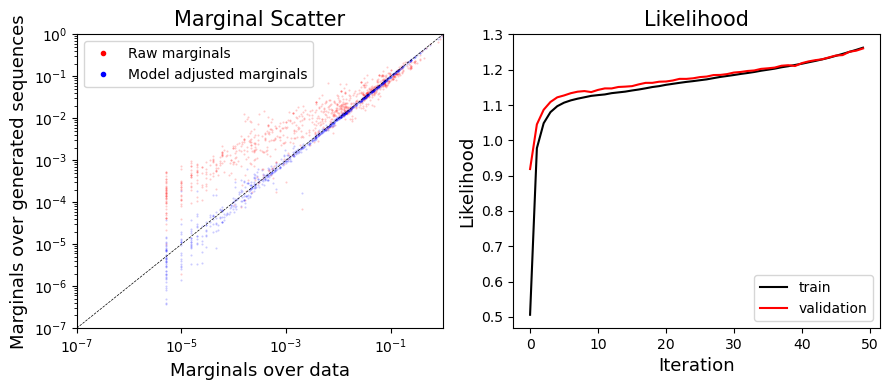

In [6]:
plot_sonia=Plotter(qm)
plot_sonia.plot_model_learning()

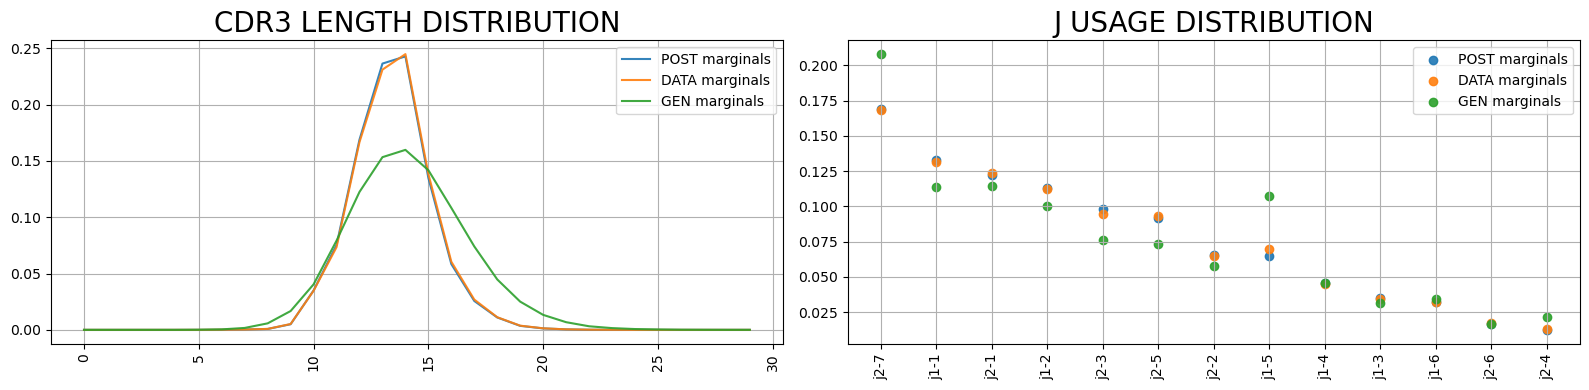

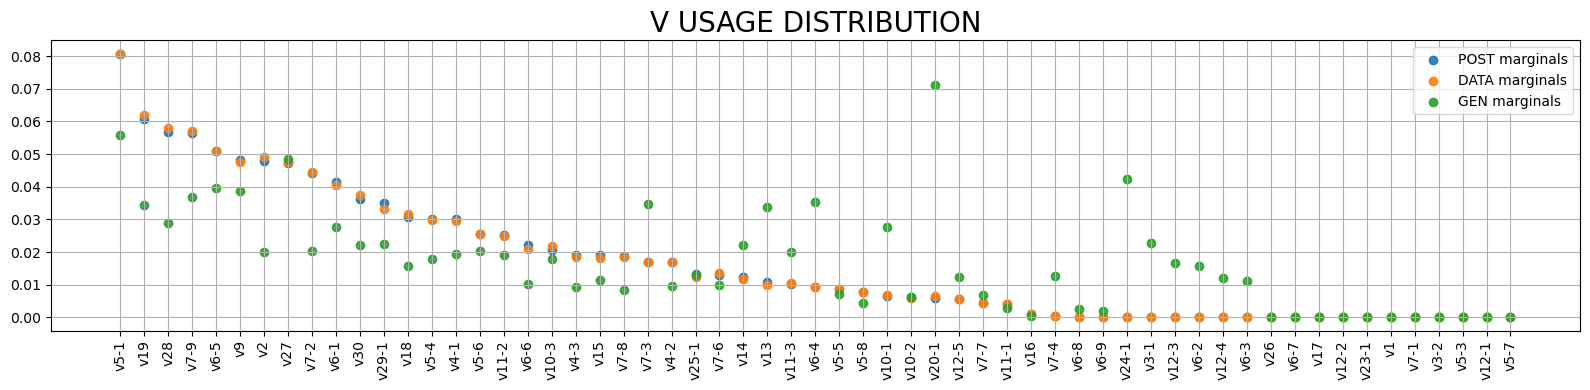

In [7]:
plot_sonia.plot_vjl()

# Generate sequences

In [8]:
pre_seqs=qm.generate_sequences_pre(int(1e4))
pre_seqs[:3]

100%|████████████████████████████████████████| 10000/10000 [00:00<00:00, 27153.10it/s]


array([['CASSRESPQPQHF', 'TRBV13', 'TRBJ1-5',
        'TGTGCCAGCAGCAGGGAGAGCCCTCAGCCCCAGCATTTT'],
       ['CASKEGYGYTF', 'TRBV4-1', 'TRBJ1-2',
        'TGCGCCAGCAAGGAGGGCTATGGCTACACCTTC'],
       ['CASGLVRRGGSSYNEQFF', 'TRBV12-5', 'TRBJ2-1',
        'TGTGCTAGTGGTTTGGTACGGCGGGGGGGTAGCTCCTACAATGAGCAGTTCTTC']],
      dtype='<U84')

In [9]:
post_seqs=qm.generate_sequences_post(int(1e4))
post_seqs[:3]

100%|██████████████████████████████████████| 110000/110000 [00:04<00:00, 27125.33it/s]


array([['CASSSAGTGVTDSPLHF', 'TRBV19', 'TRBJ1-6',
        'TGTGCCAGTAGTTCAGCCGGGACAGGGGTAACGGATTCACCCCTCCACTTT'],
       ['CASSLGGLEGTDTQYF', 'TRBV11-2', 'TRBJ2-3',
        'TGTGCCAGCAGCTTAGGAGGTTTGGAGGGGACAGATACGCAGTATTTT'],
       ['CASSQGFPRLAGSGELFF', 'TRBV4-3', 'TRBJ2-2',
        'TGCGCCAGCAGCCAAGGGTTCCCCCGACTAGCGGGTTCCGGGGAGCTGTTTTTT']],
      dtype='<U93')

# Evaluate sequences

In [10]:
Q_data,pgen_data,ppost_data=qm.evaluate_seqs(qm.data_seqs[:int(1e4)])
Q_gen,pgen_gen,ppost_gen=qm.evaluate_seqs(pre_seqs)
Q_model,pgen_model,ppost_model=qm.evaluate_seqs(post_seqs)
print(Q_model[:3]),
print(pgen_model[:3])
print(ppost_model[:3])

[2.831288  2.1582403 1.4839306]
[1.33770560e-12 2.27349187e-09 1.54215983e-12]
[3.78742993e-12 4.90674181e-09 2.28845814e-12]


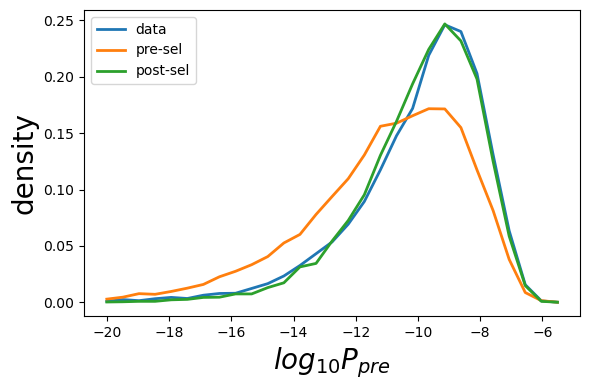

In [11]:
plot_sonia.plot_prob(data=pgen_data,gen=pgen_gen,model=pgen_model,ptype='P_{pre}')

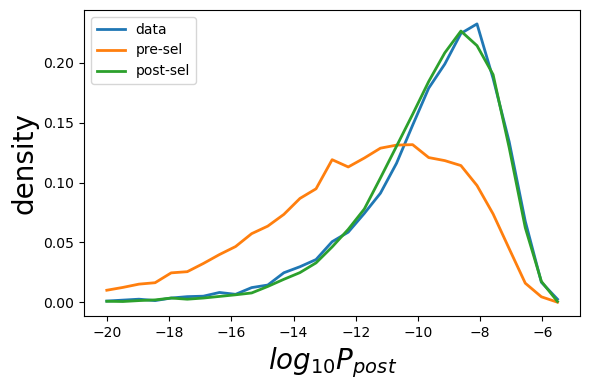

In [12]:
plot_sonia.plot_prob(ppost_data,ppost_gen,ppost_model,ptype='P_{post}')

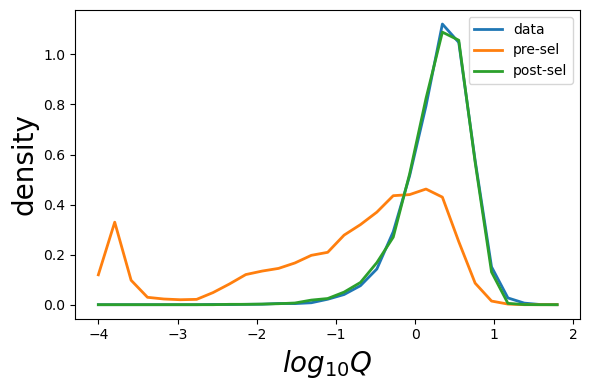

In [13]:
plot_sonia.plot_prob(Q_data,Q_gen,Q_model,ptype='Q',bin_min=-4,bin_max=2)

# some utils inherited from OLGA

In [14]:
# olga functionality can be directly accessed through the main SoNNia model

In [15]:
qm.seqgen_model.gen_rnd_prod_CDR3()

('TGCAGTGCACCTGAGGGAGCTTTGTTGAAGAGTCACAATGAGCAGTTCTTC',
 'CSAPEGALLKSHNEQFF',
 29,
 7)

In [16]:
qm.genomic_data.genJ[1]

['TRBJ1-2*01',
 'CTAACTATGGCTACACCTTC',
 'CTAACTATGGCTACACCTTCGGTTCGGGGACCAGGTTAACCGTTGTAG']

In [17]:
qm.pgen_model.PinsDJ

array([6.17437e-02, 3.61889e-02, 9.09608e-02, 1.05828e-01, 1.37586e-01,
       1.14643e-01, 9.60481e-02, 8.14864e-02, 6.38634e-02, 4.92164e-02,
       3.93751e-02, 2.90524e-02, 2.30059e-02, 1.64381e-02, 1.45157e-02,
       1.13759e-02, 5.79127e-03, 5.97164e-03, 3.92779e-03, 2.96191e-03,
       2.04381e-03, 2.48417e-03, 9.09996e-04, 1.35102e-03, 2.44798e-04,
       4.52171e-04, 9.17052e-04, 6.28282e-04, 0.00000e+00, 1.41295e-05,
       9.74155e-04, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00])

# Save and Load Model

In [18]:
qm.save_model('test')

In [19]:
qm_new=SoNNia(load_dir='test')

Cannot find data_seqs.tsv  --  no data seqs loaded.
Cannot find gen_seqs.tsv  --  no generated seqs loaded.


In [20]:
# By default sequences are not added. Adding them now.
qm_new.update_model(add_data_seqs=qm.data_seqs,add_gen_seqs=qm.gen_seqs)

Encode data.


100%|██████████████████████████████████████| 200000/200000 [00:07<00:00, 27249.69it/s]


Encode gen.


100%|██████████████████████████████████████| 500000/500000 [00:18<00:00, 26519.15it/s]


In [21]:
# Continue inference
qm_new.infer_selection(epochs=5)
qm_new.learning_history.history

{'loss': [-0.8744285702705383,
  -0.8881307244300842,
  -0.8976309895515442,
  -0.9065287113189697,
  -0.9135748744010925],
 '_likelihood': [-0.8759154081344604,
  -0.8893085718154907,
  -0.898812472820282,
  -0.907749354839325,
  -0.915101170539856],
 'val_loss': [-0.8931952714920044,
  -0.8976438045501709,
  -0.9135005474090576,
  -0.9103734493255615,
  -0.9237980842590332],
 'val__likelihood': [-0.8940345048904419,
  -0.9014341831207275,
  -0.9145326614379883,
  -0.9161443710327148,
  -0.9263010621070862]}

# Compute Diversity and Distance from Reference Distribution

In [22]:
print('model entropy is: ', qm_new.entropy(), '[bits]')

model entropy is:  30.51404685967257 [bits]


In [23]:
print('Dkl post gen is: ', qm_new.dkl_post_gen(), '[bits]')

Dkl post gen is:  1.224656 [bits]


# Load Default Sonia Models

In [5]:
# load beta model
load_dir=os.path.join(os.path.dirname(sonia.__file__), 'default_models', 'human_T_beta')
beta_model_=Sonia(load_dir=load_dir)

Metal device set to: Apple M2
Cannot find data_seqs.tsv  --  no data seqs loaded.
Cannot find gen_seqs.tsv  --  no generated seqs loaded.
